# Document Scanner
Source: https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/

# 4 Point Transformation
source: [https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/](https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/)

In [1]:
# import the necessary packages
import numpy as np
import cv2
 
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

In [2]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

In [4]:
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils

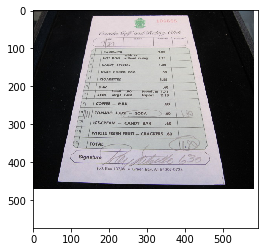

In [5]:
img = plt.imread('/Users/sampathm/Desktop/sample.jpeg')

plt.imshow(img)

STEP 1: Edge Detection


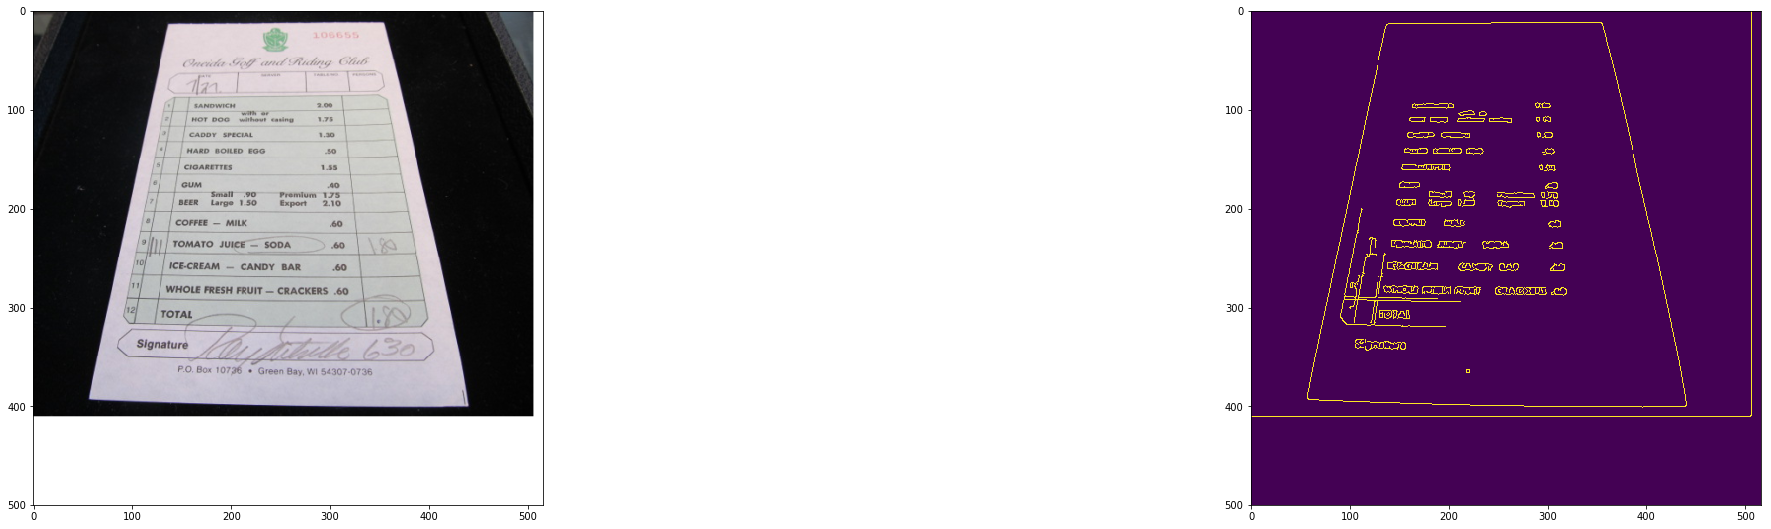

In [6]:
image = img # cv2.imread(args["image"])
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")


images = [image, edged]


columns = len(images)
plt.figure(figsize=(40,20))
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [7]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
 
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow("Outline", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


STEP 2: Find contours of paper


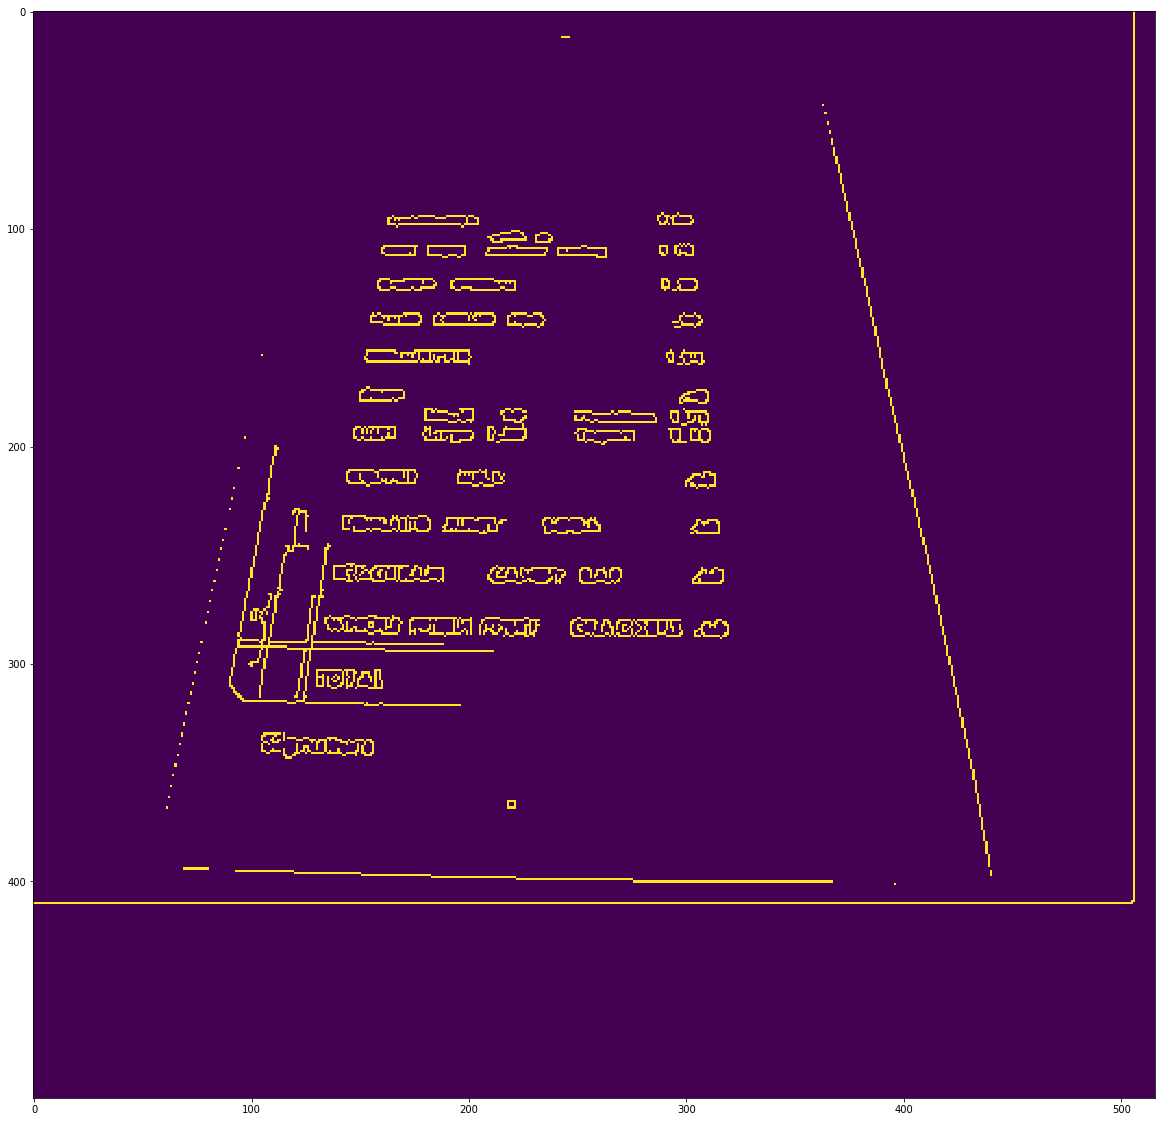

In [8]:
plt.figure(figsize=(40,20))

plt.imshow(image)

In [9]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255
 
# show the original and scanned images
print("STEP 3: Apply perspective transform")
cv2.imshow("Original", imutils.resize(orig, height = 650))
cv2.imshow("Scanned", imutils.resize(warped, height = 650))
cv2.waitKey(0)

STEP 3: Apply perspective transform


32

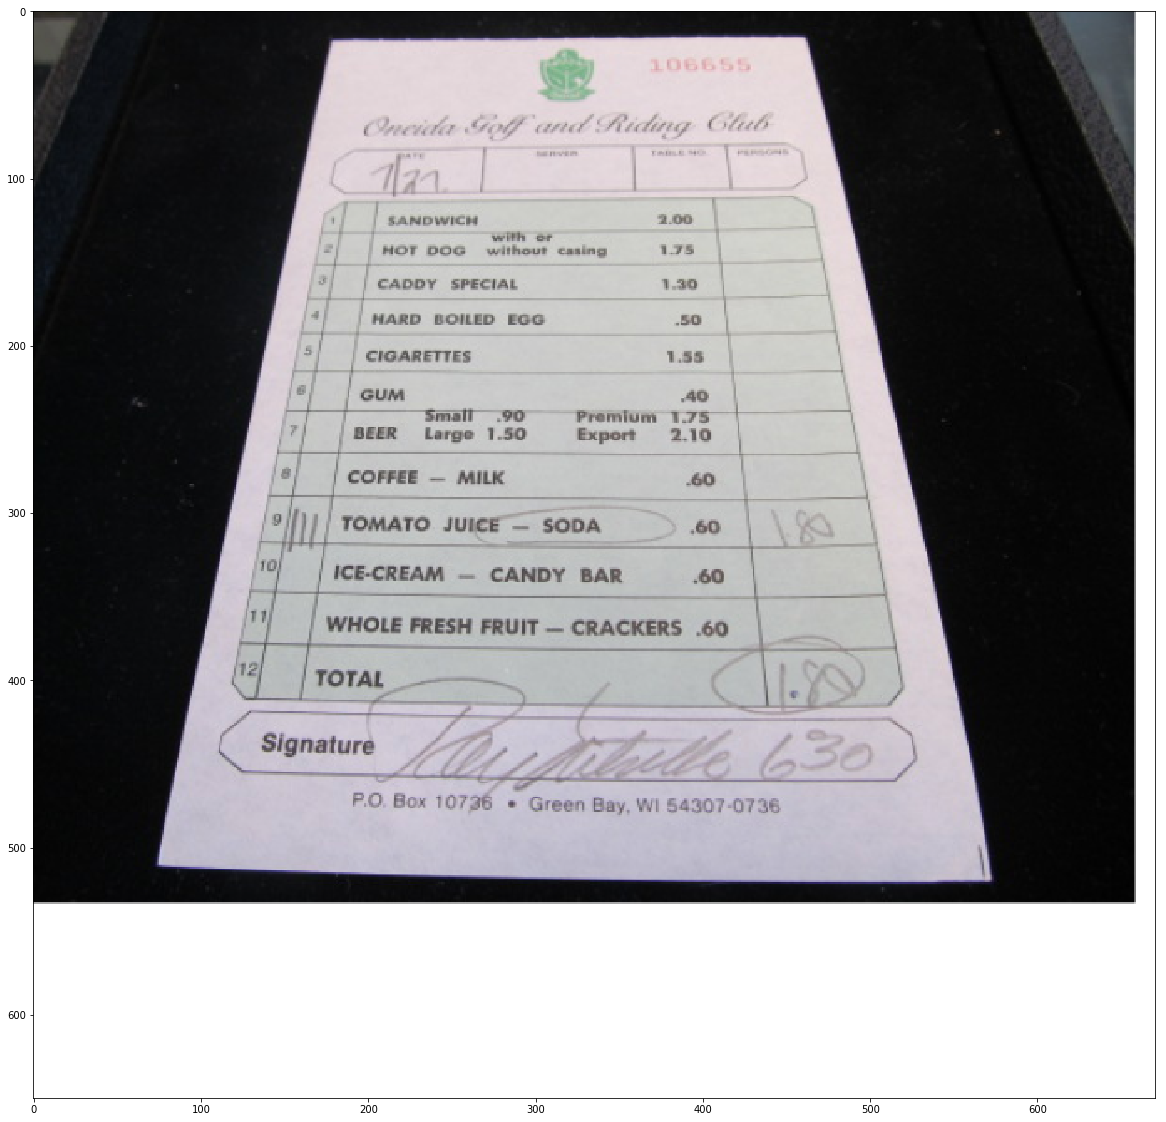

In [10]:
plt.figure(figsize=(40,20))
plt.imshow(imutils.resize(orig, height = 650))

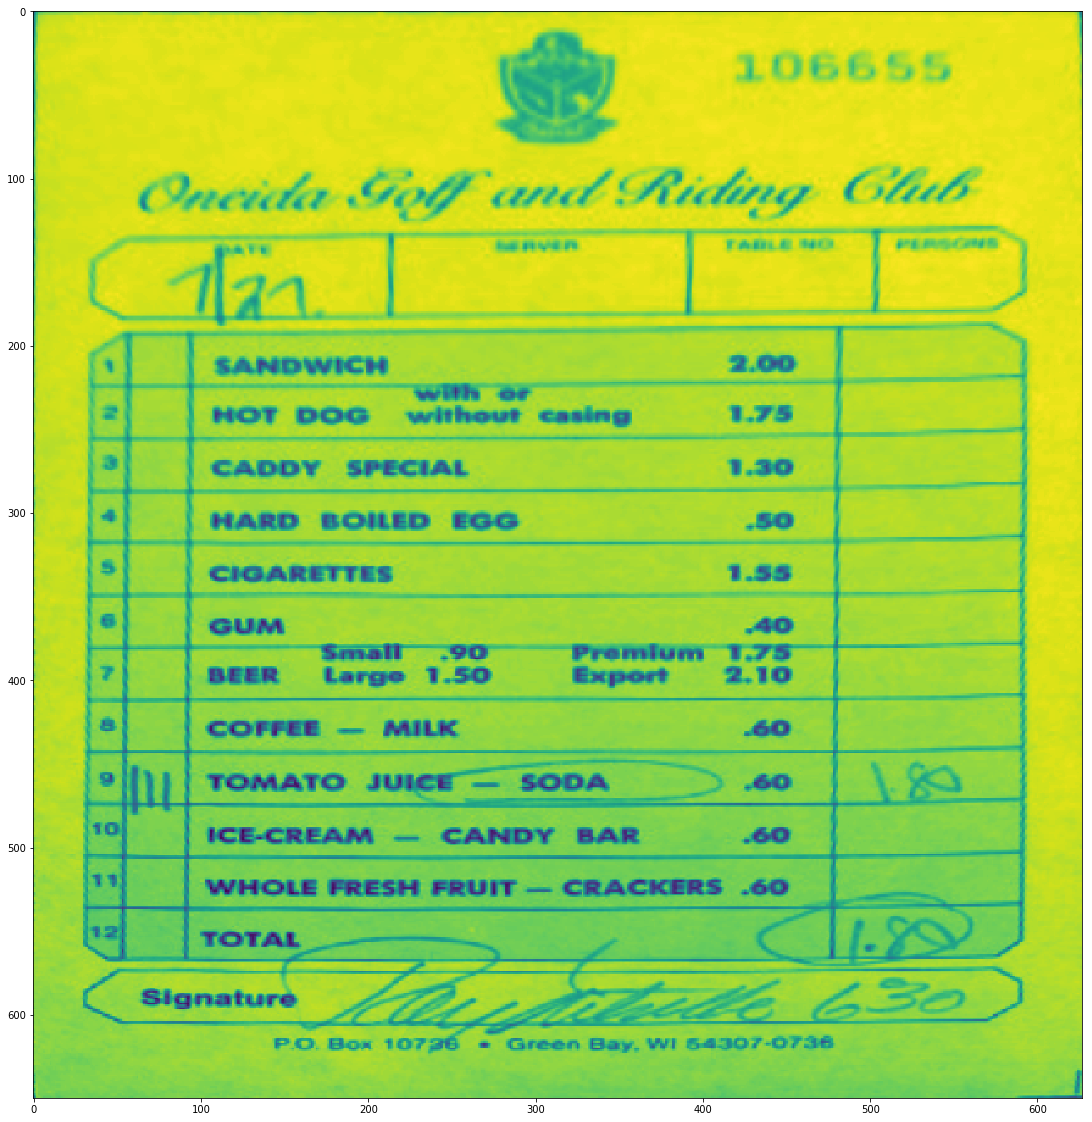

In [18]:
plt.figure(figsize=(40,20))
plt.imshow(imutils.resize(warped, height = 650))

In [17]:
imutils.resize(warped, height = 650)

array([[120, 142, 161, ..., 187, 162, 132],
       [128, 149, 167, ..., 190, 166, 137],
       [135, 156, 174, ..., 193, 170, 142],
       ...,
       [165, 184, 197, ..., 178, 184, 192],
       [148, 175, 196, ..., 157, 159, 161],
       [128, 166, 194, ..., 124, 124, 121]], dtype=uint8)

In [19]:
plt.imsave('scanned.png', imutils.resize(warped, height = 650))

In [21]:
!open scanned.png